# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Обратите внимание: в этом и во всех последующих дз за написание неоптимального кода баллы могут быть снижены. Это, в частности, относится к случаям, когда что-то можно сделать при помощи инструментов библиотек и не использовать циклы. Если вам совсем непонятно, как оптимально решить то или иное задание, посоветуйтесь с вашими семинаристами или ассистентами.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


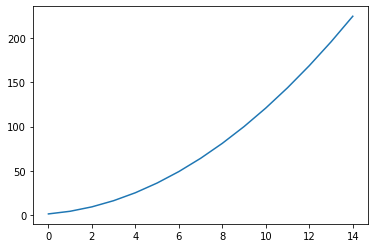

In [11]:
x = np.arange(15)
y = x ** 2 + x * 2 + 1
a = plt.plot(x,y)

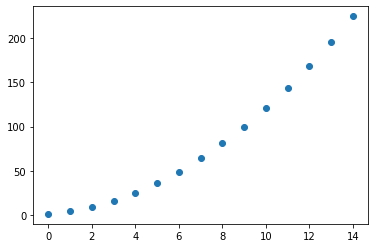

In [10]:
plt.scatter(x, y)

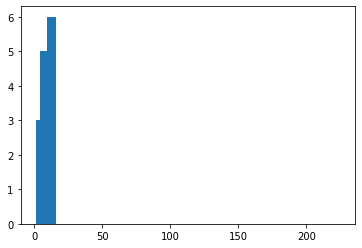

In [13]:
b = plt.hist(x, y)

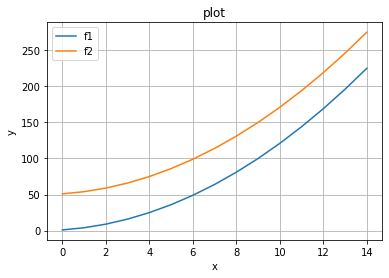

In [26]:
plt.title('plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
a = plt.plot(x, y, label = 'f1')
b = plt.plot(x, y+50, label = 'f2')
plt.legend()

Загрузим данные.

In [64]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

In [4]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


**Задание 1.** Выведите на экран размеры таблицы

In [110]:
Data.shape

(889, 13)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [111]:
Data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [112]:
Data.Sex.value_counts()

1          574
0          310
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [113]:
Data = Data.drop(Data[Data.Sex == 'unknown'].index)
Data.Sex.value_counts()

1    574
0    310
Name: Sex, dtype: int64

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [114]:
#male = 1
#female = 0

sex = Data.Sex.copy()
sex[sex == 'male'] = 1
sex[sex == 'female'] = 0
Data.Sex = sex
Data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN,0,0,1
887,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42,0,0,1
888,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148,1,0,0


Посмотрим, как влияет пол на выживаемость.

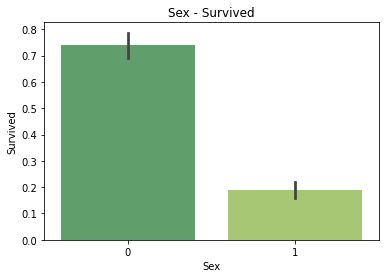

In [115]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

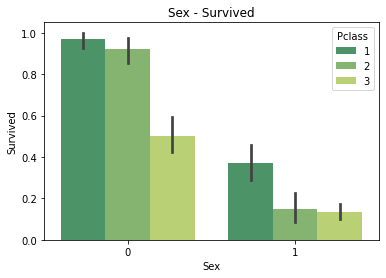

In [117]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

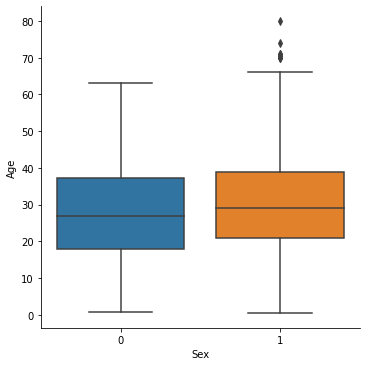

In [44]:
#ящик с усами

sns.catplot(x="Sex", y="Age", data=Data, kind="box")
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

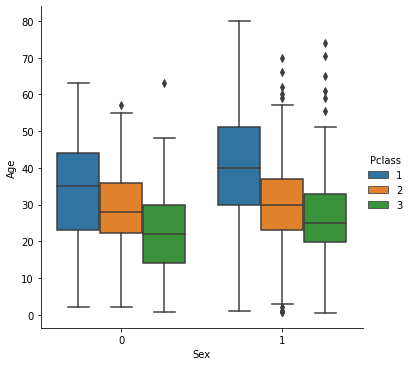

In [46]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [65]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


(891, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [66]:
Data = Data.drop(Data[Data.Embarked.isna()].index)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [ ]:
# Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [67]:
dum = pd.get_dummies(Data['Embarked'])

**Задание 7.** Удалите из таблицы Data категориальный столбец Embarked и добавьте в неё новые столбцы, полученные с помощью get_dummies.

In [69]:
Data = Data.drop('Embarked', axis = 1)

In [68]:
Data = pd.concat((Data, dum), axis =1)

In [70]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,1,0,0


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [72]:
Data.Age.isna().sum()

177

Заполним пропуски медианным значением Age.

In [77]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

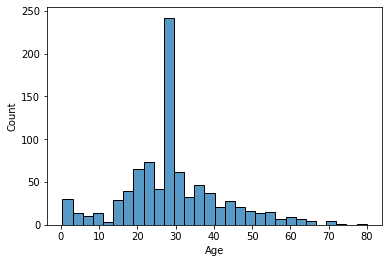

In [76]:
sns.histplot(Data['Age'], kde=False)
plt.show()

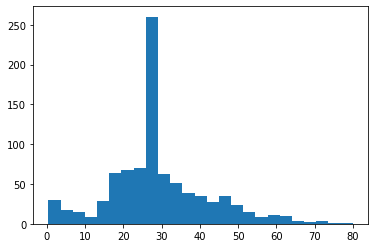

In [84]:
_ = plt.hist(Data.Age, bins = 25)

Посмотрим на распределение Pclass по возрастам.

In [90]:
import seaborn as sns


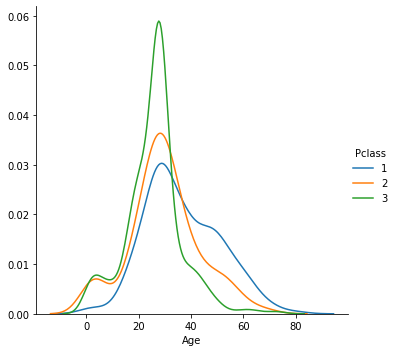

In [89]:
facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, height = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend()

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [91]:
Data.Fare.isna().sum()

0

<AxesSubplot:>

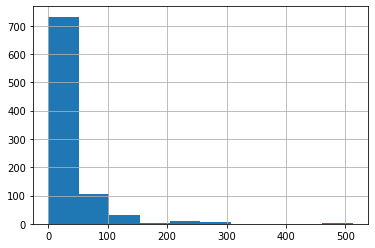

In [92]:
Data.Fare.hist()

In [93]:
(Data.Fare == 0).sum()

15

In [94]:
Data.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [95]:
Data['Pclass'].value_counts(dropna=False)

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

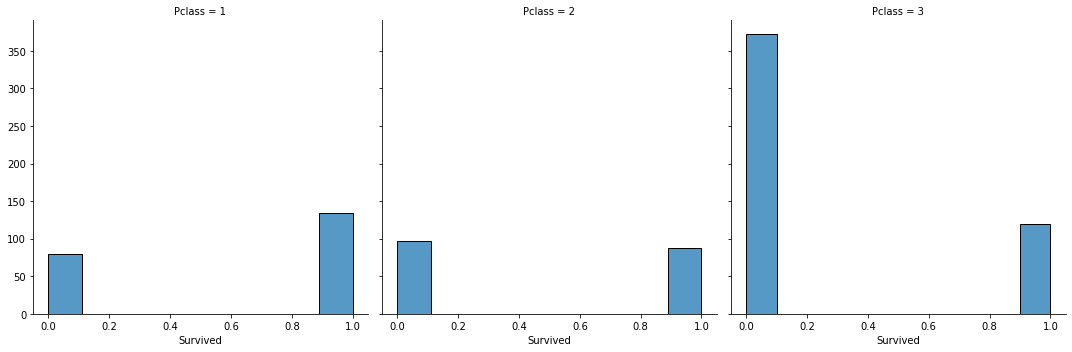

In [99]:
facet = sns.FacetGrid(data = Data, col = 'Pclass', height = 5)
facet = facet.map(sns.histplot, "Survived")

(array([372.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

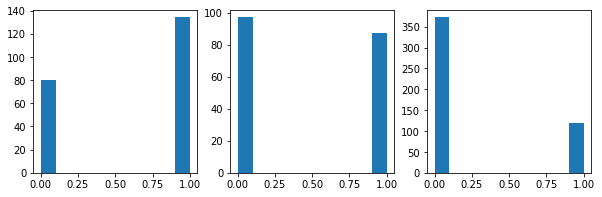

In [102]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))
ax[0].hist(Data.Survived[Data.Pclass == 1])
ax[1].hist(Data.Survived[Data.Pclass == 2])
ax[2].hist(Data.Survived[Data.Pclass == 3])

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [103]:
Data['SibSp'].value_counts(dropna=False)

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [104]:
Data['Parch'].value_counts(dropna=False)

0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [105]:
Data.drop('PassengerId', axis = 1, inplace = True)

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [118]:
Data.Sex = Data.Sex.astype('int')

In [122]:
#your code here

NumericData = Data[Data.dtypes[Data.dtypes != 'object'].index]
NumericData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

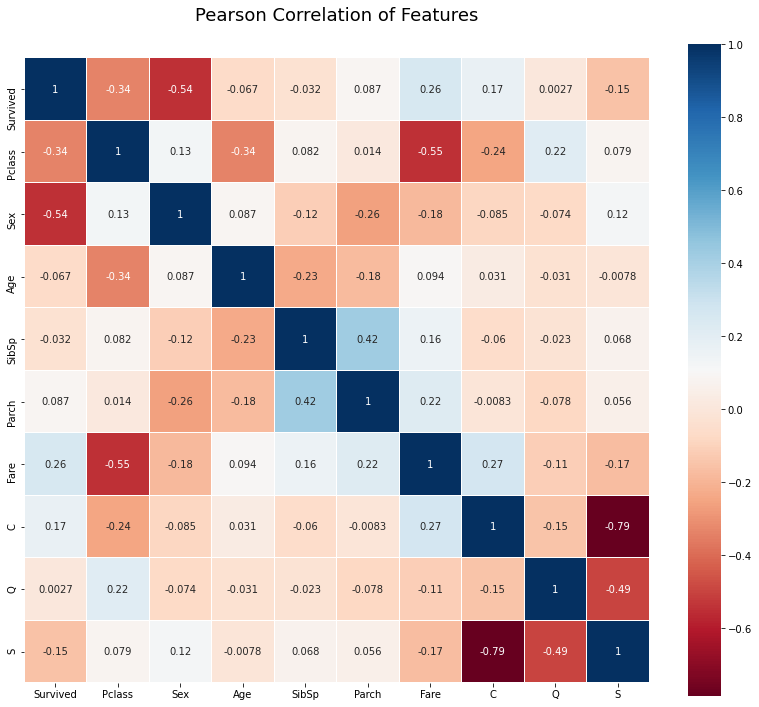

In [123]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

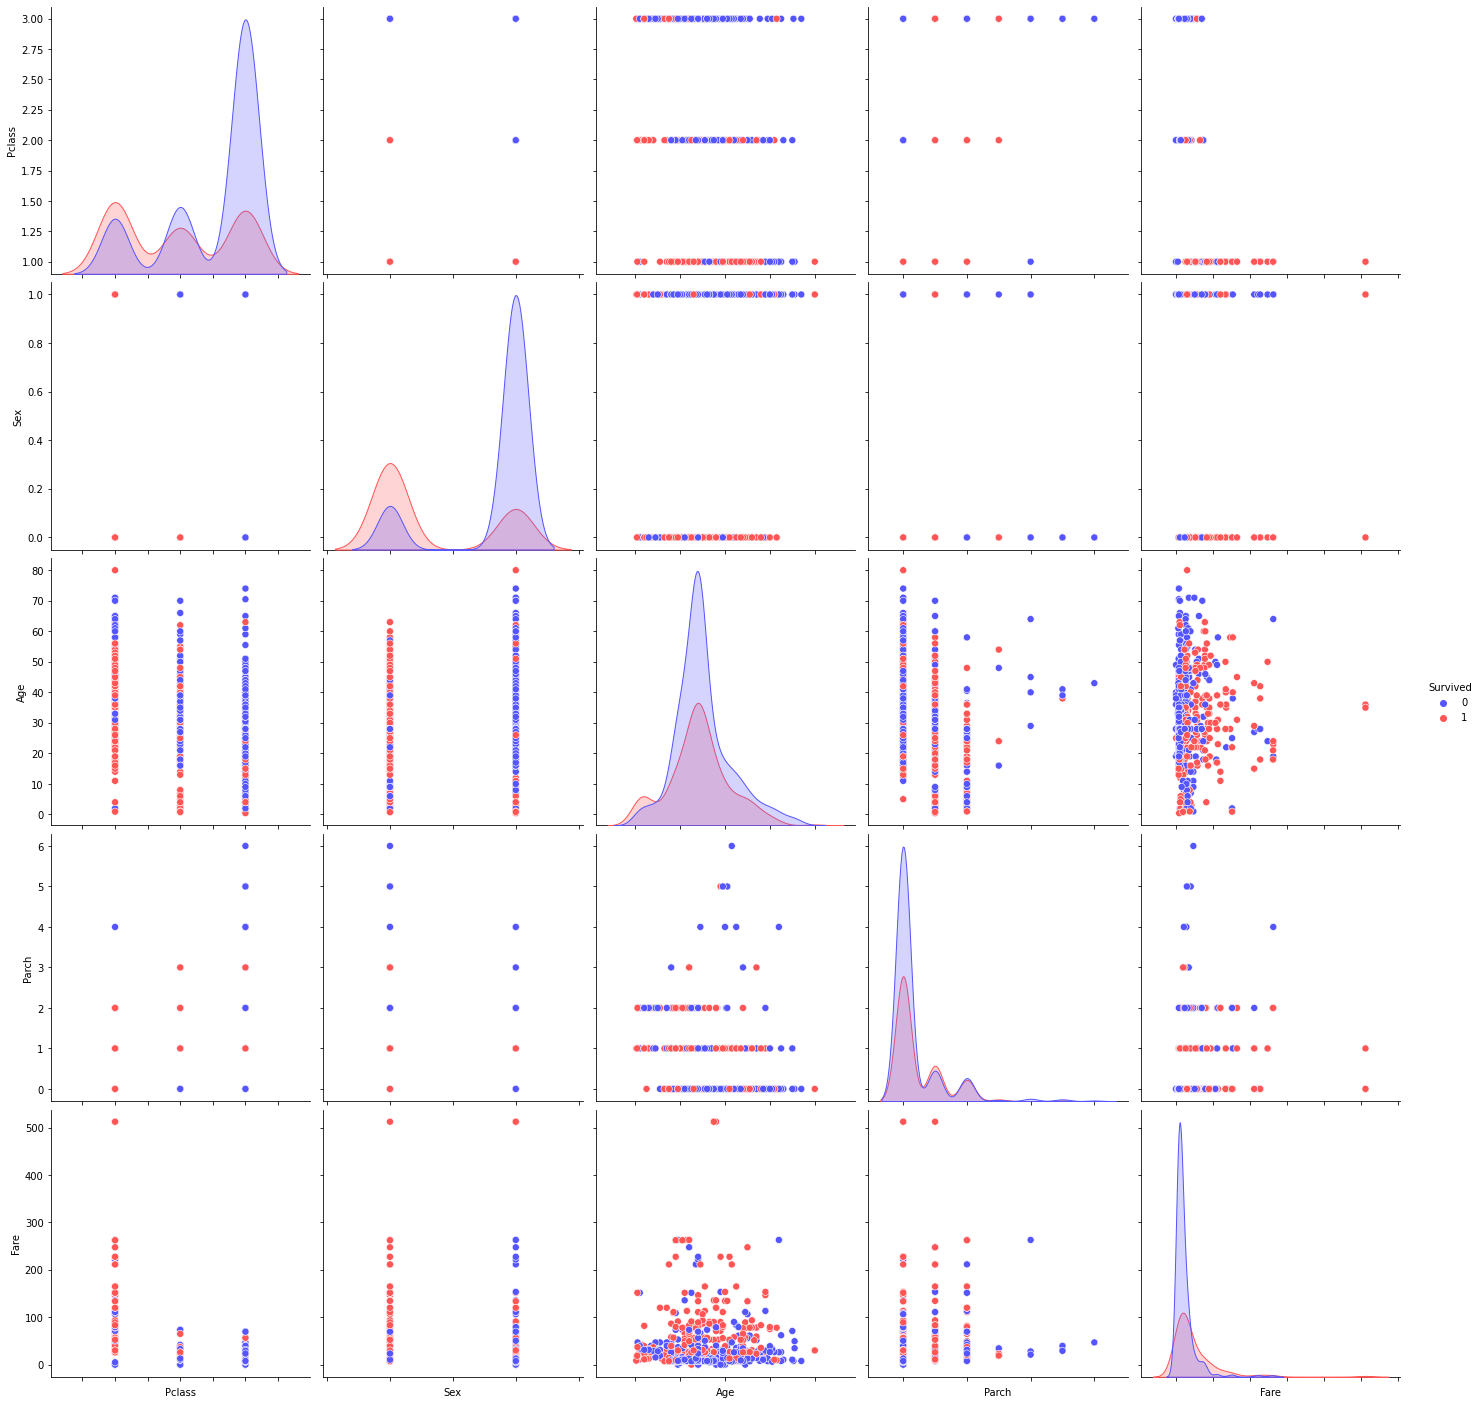

In [126]:
g = sns.pairplot(Data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']], \
                 hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [127]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [128]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [135]:
Data['FareBin'] = pd.cut(Data['Fare'].astype("float"), 4)


In [136]:
label = LabelEncoder()
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,884
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,884
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,884
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,884
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,884


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [137]:
Data['NameLen'] = Data['Name'].apply(len)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,23
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,51
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,22
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,44
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,24


In [138]:
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1

In [140]:
Data['IsAlone'] = (Data['FamilySize'] == 1).astype(int)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,24,1,1


**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

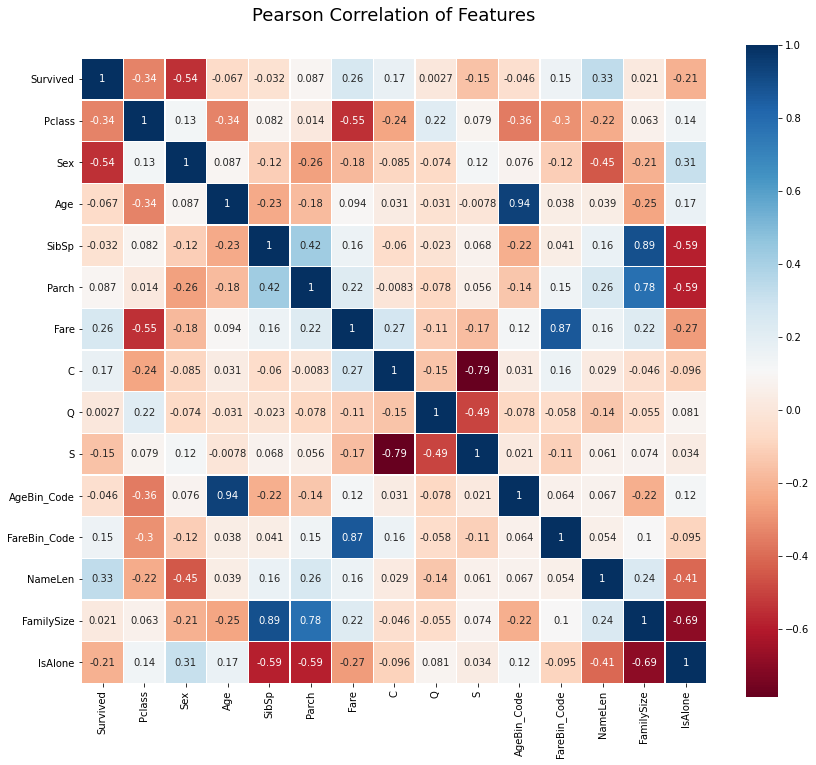

In [144]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(Data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [145]:
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,AgeBin_Code,FareBin_Code,NameLen,FamilySize,IsAlone
Survived,1.000000,-0.335506,-0.543777,-0.067165,-0.032450,0.087297,0.256200,0.170666,0.002703,-0.151664,-0.046278,0.148764,0.334584,0.020647,-0.208351
Pclass,-0.335506,1.000000,0.129810,-0.338843,0.081720,0.013969,-0.548094,-0.244692,0.217939,0.079008,-0.356574,-0.299977,-0.221675,0.063049,0.139502
Sex,-0.543777,0.129810,1.000000,0.086858,-0.116404,-0.261302,-0.181285,-0.085112,-0.074009,0.120986,0.076239,-0.116067,-0.448019,-0.208590,0.309656
Age,-0.067165,-0.338843,0.086858,1.000000,-0.234719,-0.176253,0.093524,0.030847,-0.030963,-0.007783,0.938955,0.038469,0.038872,-0.248075,0.167622
SibSp,-0.032450,0.081720,-0.116404,-0.234719,1.000000,0.421809,0.160630,-0.060457,-0.023379,0.067719,-0.220015,0.040711,0.164937,0.894969,-0.585058
Parch,0.087297,0.013969,-0.261302,-0.176253,0.421809,1.000000,0.221926,-0.008326,-0.078248,0.056153,-0.138737,0.145946,0.259406,0.782003,-0.586605
Fare,0.256200,-0.548094,-0.181285,0.093524,0.160630,0.221926,1.000000,0.270267,-0.114707,-0.165913,0.121268,0.865839,0.156199,0.219618,-0.274700
C,0.170666,-0.244692,-0.085112,0.030847,-0.060457,-0.008326,0.270267,1.000000,-0.147487,-0.786727,0.031043,0.160994,0.028655,-0.045656,-0.096018
Q,0.002703,0.217939,-0.074009,-0.030963,-0.023379,-0.078248,-0.114707,-0.147487,1.000000,-0.494518,-0.077866,-0.058287,-0.138802,-0.054572,0.081141
S,-0.151664,0.079008,0.120986,-0.007783,0.067719,0.056153,-0.165913,-0.786727,-0.494518,1.000000,0.021319,-0.105100,0.061449,0.074181,0.033736
